# 01 Importing Libraries and Data Q2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Assigning a path
path = r'/Users/dramblys/Desktop/Achievement 6/World Happiness Project'

In [3]:
# Import Data
df_whp=pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'WHP.csv'))

In [4]:
%matplotlib inline

# 02 Data Preparation

### 2.1 Cleaning/Checking Data Q3

In [5]:
df_whp.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government'],
      dtype='object')

In [6]:
df_whp.shape

(2089, 12)

In [7]:
# Check for missing values

df_whp.isnull().sum()

Country name                           0
year                                   0
Life Ladder                            0
Log GDP per capita                    27
Social support                        13
Healthy life expectancy at birth      58
Freedom to make life choices          32
Generosity                            80
Perceptions of corruption            113
Positive affect                       24
Negative affect                       16
Confidence in national government    216
dtype: int64

In [8]:
# Create subset of missing
df_whp_nan = df_whp[df_whp['Log GDP per capita'].isnull()==True]

In [9]:
df_whp_nan

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
12,Afghanistan,2021,2.436034,NaN,0.454175,54.549999,0.394306,NaN,0.946299,0.178886,0.606713,0.255620
449,Cuba,2006,5.417869,NaN,0.969595,68.000000,0.281458,NaN,NaN,0.596187,0.276602,0.513176
463,Cyprus,2021,6.269202,NaN,0.855357,72.800003,0.717639,NaN,0.876456,0.641121,0.274684,0.321940
758,Hong Kong S.A.R. of China,2021,5.321551,NaN,0.821089,NaN,0.668631,NaN,0.389589,0.534148,0.223565,0.495274
971,Kosovo,2007,5.103906,NaN,0.847812,NaN,0.381364,NaN,0.894462,0.613723,0.236699,0.375601
985,Kosovo,2021,6.648499,NaN,0.848839,NaN,0.840117,NaN,0.842379,0.578284,0.116078,0.577199
1165,Malta,2021,6.443715,NaN,0.897113,71.599998,0.889074,NaN,0.752516,0.635254,0.375325,0.662025
1373,North Cyprus,2012,5.463305,NaN,0.871150,NaN,0.692568,NaN,0.854730,0.548641,0.405435,0.414000
1374,North Cyprus,2013,5.566803,NaN,0.869274,NaN,0.775383,NaN,0.715356,0.506441,0.442972,0.401788
1375,North Cyprus,2014,5.785979,NaN,0.801802,NaN,0.829677,NaN,0.692221,0.570316,0.311336,0.412390


In [10]:
# Create subset/new df without missing
df_whp_gdp_clean = df_whp[df_whp['Log GDP per capita'].isnull() == False]

In [11]:
# Check if 27/2089 were removed 
df_whp_gdp_clean.shape

(2062, 12)

In [12]:
# Check for duplicates
dups = df_whp_gdp_clean.duplicated()
dups.shape

(2062,)

### 2.2 Exploring Data visually Q4

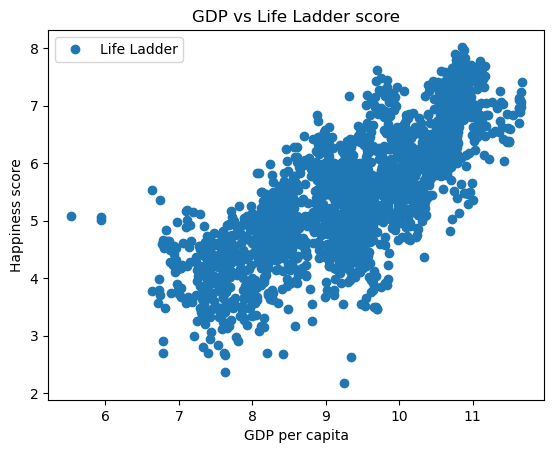

In [13]:
# Create a scatterplot 

df_whp_gdp_clean.plot(x = 'Log GDP per capita', y='Life Ladder',style='o') 
plt.title('GDP vs Life Ladder score')  
plt.xlabel('GDP per capita')  
plt.ylabel('Happiness score')  
plt.show()

Q5: Hypothesis
The higher is country's GDP per capita, the happier people report feeling. 

### 2.3 Reshaping variables into NumPy arrays Q6

In [14]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_whp_gdp_clean['Log GDP per capita'].values.reshape(-1,1)
y = df_whp_gdp_clean['Life Ladder'].values.reshape(-1,1)

In [15]:
X

array([[7.30257368],
       [7.47244644],
       [7.57918262],
       ...,
       [8.19699764],
       [8.117733  ],
       [8.15324783]])

In [16]:
y

array([[3.7235899 ],
       [4.40177822],
       [4.75838089],
       ...,
       [2.69352317],
       [3.1598022 ],
       [3.15457821]])

### 2.4 Splitting data into training and test sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 03 Regression Analysis Q8

In [18]:
# Create a regression object.

regression = LinearRegression()

In [19]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

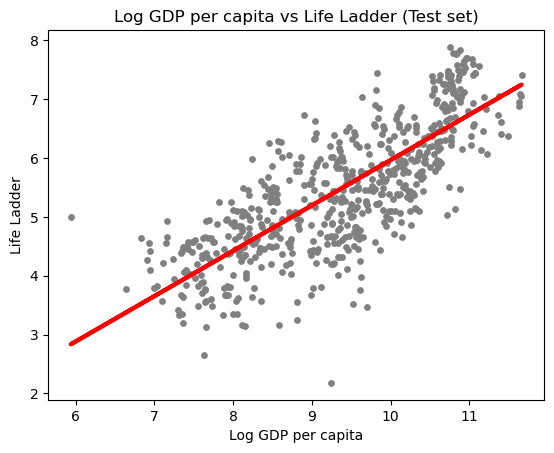

In [21]:
# Create a plot that shows the regression line from the model on the test set. Q9

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Log GDP per capita vs Life Ladder (Test set)')
plot_test.xlabel('Log GDP per capita')
plot_test.ylabel('Life Ladder')
plot_test.show()

Q10: Interpret how well the line appears to fit the data
There are many observations scattered further from the line, but the trend is there and quite obvious. 

In [22]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [23]:
# Print the model summary statistics. This is where you evaluate the performance of the model. Q11

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.77034895]]
Mean squared error:  0.47836344911135703
R2 score:  0.5986457210825282


In [24]:
y_predicted

array([[6.0233194 ],
       [6.32178466],
       [6.0682359 ],
       [6.26266127],
       [5.48400329],
       [6.78654361],
       [6.57822064],
       [4.82909251],
       [6.79201096],
       [5.92180601],
       [4.79996536],
       [5.44584715],
       [3.57770083],
       [3.96226113],
       [6.53141092],
       [4.81101248],
       [4.50867114],
       [4.97399724],
       [6.53936731],
       [5.60056182],
       [6.18185653],
       [5.60894432],
       [5.21643718],
       [5.94880998],
       [4.83667789],
       [5.3186676 ],
       [5.64473264],
       [4.51297259],
       [6.30157338],
       [4.54358669],
       [5.85809171],
       [4.45898375],
       [6.50310292],
       [6.67614742],
       [5.49825353],
       [5.38077005],
       [5.94454674],
       [5.47137738],
       [5.77947994],
       [4.40896024],
       [5.08033516],
       [5.73360324],
       [5.40225377],
       [5.82062615],
       [5.74885408],
       [5.58399005],
       [5.6798943 ],
       [6.261

In [25]:
# Create a dataframe comparing the actual and predicted values of y. Q12

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.835483,6.023319
1,6.095473,6.321785
2,5.968871,6.068236
3,5.647690,6.262661
4,5.057561,5.484003
5,6.585246,6.786544
6,6.855329,6.578221
7,5.268375,4.829093
8,7.444262,6.792011
9,5.022758,5.921806


Q13: Discuss how well the model performed on the test set
Slope (0.77) shows positive relationship: higher GDP - higher LL scores. 
MSE (0.48) is quite small, so the line is quite a good fit. 
R2 (0.6), while not perfect, it is closer to 1 than 0. 

The training set is only very slightly better - no overfitting. 

In [26]:
# Predict train

y_predicted_train = regression.predict(X_train) 

In [27]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [28]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.77034895]]
Mean squared error:  0.48421278652947647
R2 score:  0.6166944835488215


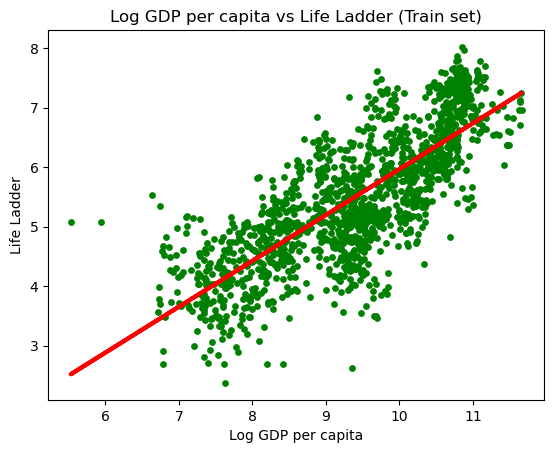

In [29]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Log GDP per capita vs Life Ladder (Train set)')
plot_test.xlabel('Log GDP per capita')
plot_test.ylabel('Life Ladder')
plot_test.show()

# 04 Exporting

In [30]:
# exporting df_whp_gdp_clean
df_whp_gdp_clean.to_csv(os.path.join(path,'02 Data', 'Prepared Data', 'whp_gdp_clean.csv'))